In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   6   7   9  11  13  15  16  17  19  20  21  22  23  24  25
  26  28  29  30  32  33  35  36  38  41  42  43  44  45  46  47  51  53
  54  56  57  58  59  60  61  62  63  65  66  67  69  70  72  73  74  78
  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  98  99
 100 102 104 105 106 107 108 109 110 111 112 114 115 117 119 120 121 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 143
 144 146 147 148 149 151 152 153 154 155 158 159 160 161 163 164 165 166
 167 168 169 170 171 173 174 176 177 178 179 180 182 183 184 185 186 187
 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207 208 209 211
 212 213 214 216 217 218 219 220 221 223 224 225 226 227 228 229 232 233
 234 237 238 243 244 245 246 248 250 253 254 256 257 259 260 262 264 265
 268 269 272 273 274 275 276 277 278 279 280 281 282 283 284 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 302 303 304 305 307 308
 309 310 311 312 313 314 315 316 321 322 323

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .5,
                      max_depth=4, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[21:13:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08224	validation_0-mlogloss:1.09505	validation_1-merror:0.08911	validation_1-mlogloss:1.09510
[1]	validation_0-merror:0.08224	validation_0-mlogloss:1.09335	validation_1-merror:0.08911	validation_1-mlogloss:1.09350
[2]	validation_0-merror:0.08224	validation_0-mlogloss:1.08987	validation_1-merror:0.08911	validation_1-mlogloss:1.09007
[3]	validation_0-merror:0.08224	validation_0-mlogloss:1.08636	validation_1-merror:0.08911	validation_1-mlogloss:1.08660
[4]	validation_0-merror:0.08224	validation_0-mlogloss:1.08298	validation_1-merror:0.08911	validation_1-mlogloss:1.08327
[5]	validation_0-merror:0.08224	validation_

[65]	validation_0-merror:0.08224	validation_0-mlogloss:0.92801	validation_1-merror:0.08911	validation_1-mlogloss:0.93067
[66]	validation_0-merror:0.08224	validation_0-mlogloss:0.92556	validation_1-merror:0.08911	validation_1-mlogloss:0.92825
[67]	validation_0-merror:0.08224	validation_0-mlogloss:0.92313	validation_1-merror:0.08911	validation_1-mlogloss:0.92585
[68]	validation_0-merror:0.08224	validation_0-mlogloss:0.92077	validation_1-merror:0.08911	validation_1-mlogloss:0.92352
[69]	validation_0-merror:0.08224	validation_0-mlogloss:0.91973	validation_1-merror:0.08911	validation_1-mlogloss:0.92251
[70]	validation_0-merror:0.08224	validation_0-mlogloss:0.91738	validation_1-merror:0.08911	validation_1-mlogloss:0.92019
[71]	validation_0-merror:0.08224	validation_0-mlogloss:0.91504	validation_1-merror:0.08911	validation_1-mlogloss:0.91788
[72]	validation_0-merror:0.08224	validation_0-mlogloss:0.91336	validation_1-merror:0.08911	validation_1-mlogloss:0.91622
[73]	validation_0-merror:0.08224

[133]	validation_0-merror:0.08224	validation_0-mlogloss:0.80729	validation_1-merror:0.08911	validation_1-mlogloss:0.81186
[134]	validation_0-merror:0.08224	validation_0-mlogloss:0.80555	validation_1-merror:0.08911	validation_1-mlogloss:0.81012
[135]	validation_0-merror:0.08224	validation_0-mlogloss:0.80431	validation_1-merror:0.08911	validation_1-mlogloss:0.80888
[136]	validation_0-merror:0.08224	validation_0-mlogloss:0.80316	validation_1-merror:0.08911	validation_1-mlogloss:0.80779
[137]	validation_0-merror:0.08224	validation_0-mlogloss:0.80146	validation_1-merror:0.08911	validation_1-mlogloss:0.80611
[138]	validation_0-merror:0.08224	validation_0-mlogloss:0.80026	validation_1-merror:0.08911	validation_1-mlogloss:0.80493
[139]	validation_0-merror:0.08224	validation_0-mlogloss:0.79916	validation_1-merror:0.08911	validation_1-mlogloss:0.80383
[140]	validation_0-merror:0.08224	validation_0-mlogloss:0.79743	validation_1-merror:0.08911	validation_1-mlogloss:0.80213
[141]	validation_0-merro

[201]	validation_0-merror:0.08224	validation_0-mlogloss:0.71952	validation_1-merror:0.08911	validation_1-mlogloss:0.72532
[202]	validation_0-merror:0.08224	validation_0-mlogloss:0.71828	validation_1-merror:0.08911	validation_1-mlogloss:0.72410
[203]	validation_0-merror:0.08224	validation_0-mlogloss:0.71708	validation_1-merror:0.08911	validation_1-mlogloss:0.72290
[204]	validation_0-merror:0.08224	validation_0-mlogloss:0.71583	validation_1-merror:0.08911	validation_1-mlogloss:0.72167
[205]	validation_0-merror:0.08224	validation_0-mlogloss:0.71500	validation_1-merror:0.08911	validation_1-mlogloss:0.72084
[206]	validation_0-merror:0.08224	validation_0-mlogloss:0.71379	validation_1-merror:0.08911	validation_1-mlogloss:0.71964
[207]	validation_0-merror:0.08224	validation_0-mlogloss:0.71260	validation_1-merror:0.08911	validation_1-mlogloss:0.71847
[208]	validation_0-merror:0.08224	validation_0-mlogloss:0.71181	validation_1-merror:0.08911	validation_1-mlogloss:0.71767
[209]	validation_0-merro

[269]	validation_0-merror:0.08224	validation_0-mlogloss:0.65900	validation_1-merror:0.08911	validation_1-mlogloss:0.66563
[270]	validation_0-merror:0.08224	validation_0-mlogloss:0.65846	validation_1-merror:0.08911	validation_1-mlogloss:0.66509
[271]	validation_0-merror:0.08224	validation_0-mlogloss:0.65752	validation_1-merror:0.08911	validation_1-mlogloss:0.66417
[272]	validation_0-merror:0.08224	validation_0-mlogloss:0.65693	validation_1-merror:0.08911	validation_1-mlogloss:0.66357
[273]	validation_0-merror:0.08224	validation_0-mlogloss:0.65600	validation_1-merror:0.08911	validation_1-mlogloss:0.66265
[274]	validation_0-merror:0.08224	validation_0-mlogloss:0.65507	validation_1-merror:0.08911	validation_1-mlogloss:0.66173
[275]	validation_0-merror:0.08224	validation_0-mlogloss:0.65449	validation_1-merror:0.08911	validation_1-mlogloss:0.66118
[276]	validation_0-merror:0.08224	validation_0-mlogloss:0.65357	validation_1-merror:0.08911	validation_1-mlogloss:0.66027
[277]	validation_0-merro

[337]	validation_0-merror:0.08224	validation_0-mlogloss:0.61256	validation_1-merror:0.08911	validation_1-mlogloss:0.61983
[338]	validation_0-merror:0.08224	validation_0-mlogloss:0.61182	validation_1-merror:0.08911	validation_1-mlogloss:0.61909
[339]	validation_0-merror:0.08224	validation_0-mlogloss:0.61137	validation_1-merror:0.08911	validation_1-mlogloss:0.61863
[340]	validation_0-merror:0.08224	validation_0-mlogloss:0.61098	validation_1-merror:0.08911	validation_1-mlogloss:0.61827
[341]	validation_0-merror:0.08224	validation_0-mlogloss:0.61029	validation_1-merror:0.08911	validation_1-mlogloss:0.61759
[342]	validation_0-merror:0.08224	validation_0-mlogloss:0.60957	validation_1-merror:0.08911	validation_1-mlogloss:0.61688
[343]	validation_0-merror:0.08224	validation_0-mlogloss:0.60889	validation_1-merror:0.08911	validation_1-mlogloss:0.61620
[344]	validation_0-merror:0.08224	validation_0-mlogloss:0.60848	validation_1-merror:0.08911	validation_1-mlogloss:0.61578
[345]	validation_0-merro

[405]	validation_0-merror:0.08224	validation_0-mlogloss:0.57775	validation_1-merror:0.08911	validation_1-mlogloss:0.58545
[406]	validation_0-merror:0.08224	validation_0-mlogloss:0.57747	validation_1-merror:0.08911	validation_1-mlogloss:0.58516
[407]	validation_0-merror:0.08224	validation_0-mlogloss:0.57691	validation_1-merror:0.08911	validation_1-mlogloss:0.58461
[408]	validation_0-merror:0.08224	validation_0-mlogloss:0.57637	validation_1-merror:0.08911	validation_1-mlogloss:0.58407
[409]	validation_0-merror:0.08224	validation_0-mlogloss:0.57577	validation_1-merror:0.08911	validation_1-mlogloss:0.58347
[410]	validation_0-merror:0.08224	validation_0-mlogloss:0.57522	validation_1-merror:0.08911	validation_1-mlogloss:0.58293
[411]	validation_0-merror:0.08224	validation_0-mlogloss:0.57465	validation_1-merror:0.08911	validation_1-mlogloss:0.58237
[412]	validation_0-merror:0.08224	validation_0-mlogloss:0.57407	validation_1-merror:0.08911	validation_1-mlogloss:0.58179
[413]	validation_0-merro

[473]	validation_0-merror:0.08224	validation_0-mlogloss:0.55002	validation_1-merror:0.08911	validation_1-mlogloss:0.55797
[474]	validation_0-merror:0.08224	validation_0-mlogloss:0.54975	validation_1-merror:0.08911	validation_1-mlogloss:0.55773
[475]	validation_0-merror:0.08224	validation_0-mlogloss:0.54932	validation_1-merror:0.08911	validation_1-mlogloss:0.55729
[476]	validation_0-merror:0.08224	validation_0-mlogloss:0.54881	validation_1-merror:0.08911	validation_1-mlogloss:0.55679
[477]	validation_0-merror:0.08224	validation_0-mlogloss:0.54863	validation_1-merror:0.08911	validation_1-mlogloss:0.55660
[478]	validation_0-merror:0.08224	validation_0-mlogloss:0.54820	validation_1-merror:0.08911	validation_1-mlogloss:0.55617
[479]	validation_0-merror:0.08224	validation_0-mlogloss:0.54774	validation_1-merror:0.08911	validation_1-mlogloss:0.55572
[480]	validation_0-merror:0.08224	validation_0-mlogloss:0.54728	validation_1-merror:0.08911	validation_1-mlogloss:0.55526
[481]	validation_0-merro

[541]	validation_0-merror:0.08224	validation_0-mlogloss:0.52868	validation_1-merror:0.08911	validation_1-mlogloss:0.53684
[542]	validation_0-merror:0.08224	validation_0-mlogloss:0.52847	validation_1-merror:0.08911	validation_1-mlogloss:0.53664
[543]	validation_0-merror:0.08224	validation_0-mlogloss:0.52809	validation_1-merror:0.08911	validation_1-mlogloss:0.53626
[544]	validation_0-merror:0.08224	validation_0-mlogloss:0.52769	validation_1-merror:0.08911	validation_1-mlogloss:0.53587
[545]	validation_0-merror:0.08224	validation_0-mlogloss:0.52748	validation_1-merror:0.08911	validation_1-mlogloss:0.53566
[546]	validation_0-merror:0.08224	validation_0-mlogloss:0.52712	validation_1-merror:0.08911	validation_1-mlogloss:0.53532
[547]	validation_0-merror:0.08224	validation_0-mlogloss:0.52673	validation_1-merror:0.08911	validation_1-mlogloss:0.53493
[548]	validation_0-merror:0.08224	validation_0-mlogloss:0.52637	validation_1-merror:0.08911	validation_1-mlogloss:0.53457
[549]	validation_0-merro

[609]	validation_0-merror:0.08224	validation_0-mlogloss:0.51070	validation_1-merror:0.08911	validation_1-mlogloss:0.51907
[610]	validation_0-merror:0.08224	validation_0-mlogloss:0.51050	validation_1-merror:0.08911	validation_1-mlogloss:0.51888
[611]	validation_0-merror:0.08224	validation_0-mlogloss:0.51016	validation_1-merror:0.08911	validation_1-mlogloss:0.51854
[612]	validation_0-merror:0.08224	validation_0-mlogloss:0.50997	validation_1-merror:0.08911	validation_1-mlogloss:0.51836
[613]	validation_0-merror:0.08224	validation_0-mlogloss:0.50966	validation_1-merror:0.08911	validation_1-mlogloss:0.51805
[614]	validation_0-merror:0.08224	validation_0-mlogloss:0.50947	validation_1-merror:0.08911	validation_1-mlogloss:0.51787
[615]	validation_0-merror:0.08224	validation_0-mlogloss:0.50926	validation_1-merror:0.08911	validation_1-mlogloss:0.51768
[616]	validation_0-merror:0.08224	validation_0-mlogloss:0.50892	validation_1-merror:0.08911	validation_1-mlogloss:0.51733
[617]	validation_0-merro

[677]	validation_0-merror:0.08224	validation_0-mlogloss:0.49622	validation_1-merror:0.08911	validation_1-mlogloss:0.50462
[678]	validation_0-merror:0.08224	validation_0-mlogloss:0.49605	validation_1-merror:0.08911	validation_1-mlogloss:0.50447
[679]	validation_0-merror:0.08224	validation_0-mlogloss:0.49579	validation_1-merror:0.08911	validation_1-mlogloss:0.50420
[680]	validation_0-merror:0.08224	validation_0-mlogloss:0.49567	validation_1-merror:0.08911	validation_1-mlogloss:0.50407
[681]	validation_0-merror:0.08224	validation_0-mlogloss:0.49539	validation_1-merror:0.08911	validation_1-mlogloss:0.50380
[682]	validation_0-merror:0.08224	validation_0-mlogloss:0.49511	validation_1-merror:0.08911	validation_1-mlogloss:0.50351
[683]	validation_0-merror:0.08224	validation_0-mlogloss:0.49481	validation_1-merror:0.08911	validation_1-mlogloss:0.50322
[684]	validation_0-merror:0.08224	validation_0-mlogloss:0.49464	validation_1-merror:0.08911	validation_1-mlogloss:0.50306
[685]	validation_0-merro

[745]	validation_0-merror:0.08224	validation_0-mlogloss:0.48210	validation_1-merror:0.08911	validation_1-mlogloss:0.49063
[746]	validation_0-merror:0.08224	validation_0-mlogloss:0.48198	validation_1-merror:0.08911	validation_1-mlogloss:0.49050
[747]	validation_0-merror:0.08224	validation_0-mlogloss:0.48173	validation_1-merror:0.08911	validation_1-mlogloss:0.49025
[748]	validation_0-merror:0.08224	validation_0-mlogloss:0.48148	validation_1-merror:0.08911	validation_1-mlogloss:0.49000
[749]	validation_0-merror:0.08224	validation_0-mlogloss:0.48124	validation_1-merror:0.08911	validation_1-mlogloss:0.48977
[750]	validation_0-merror:0.08224	validation_0-mlogloss:0.48114	validation_1-merror:0.08911	validation_1-mlogloss:0.48967
[751]	validation_0-merror:0.08224	validation_0-mlogloss:0.48105	validation_1-merror:0.08911	validation_1-mlogloss:0.48956
[752]	validation_0-merror:0.08224	validation_0-mlogloss:0.48093	validation_1-merror:0.08911	validation_1-mlogloss:0.48943
[753]	validation_0-merro

[813]	validation_0-merror:0.08224	validation_0-mlogloss:0.46963	validation_1-merror:0.08911	validation_1-mlogloss:0.47826
[814]	validation_0-merror:0.08224	validation_0-mlogloss:0.46951	validation_1-merror:0.08911	validation_1-mlogloss:0.47815
[815]	validation_0-merror:0.08224	validation_0-mlogloss:0.46944	validation_1-merror:0.08911	validation_1-mlogloss:0.47808
[816]	validation_0-merror:0.08224	validation_0-mlogloss:0.46932	validation_1-merror:0.08911	validation_1-mlogloss:0.47797
[817]	validation_0-merror:0.08224	validation_0-mlogloss:0.46916	validation_1-merror:0.08911	validation_1-mlogloss:0.47781
[818]	validation_0-merror:0.08224	validation_0-mlogloss:0.46893	validation_1-merror:0.08911	validation_1-mlogloss:0.47758
[819]	validation_0-merror:0.08224	validation_0-mlogloss:0.46874	validation_1-merror:0.08911	validation_1-mlogloss:0.47739
[820]	validation_0-merror:0.08224	validation_0-mlogloss:0.46853	validation_1-merror:0.08911	validation_1-mlogloss:0.47718
[821]	validation_0-merro

[881]	validation_0-merror:0.08224	validation_0-mlogloss:0.45952	validation_1-merror:0.08911	validation_1-mlogloss:0.46823
[882]	validation_0-merror:0.08224	validation_0-mlogloss:0.45930	validation_1-merror:0.08911	validation_1-mlogloss:0.46801
[883]	validation_0-merror:0.08224	validation_0-mlogloss:0.45911	validation_1-merror:0.08911	validation_1-mlogloss:0.46783
[884]	validation_0-merror:0.08224	validation_0-mlogloss:0.45902	validation_1-merror:0.08911	validation_1-mlogloss:0.46774
[885]	validation_0-merror:0.08224	validation_0-mlogloss:0.45892	validation_1-merror:0.08911	validation_1-mlogloss:0.46765
[886]	validation_0-merror:0.08224	validation_0-mlogloss:0.45885	validation_1-merror:0.08911	validation_1-mlogloss:0.46757
[887]	validation_0-merror:0.08224	validation_0-mlogloss:0.45877	validation_1-merror:0.08911	validation_1-mlogloss:0.46749
[888]	validation_0-merror:0.08224	validation_0-mlogloss:0.45877	validation_1-merror:0.08911	validation_1-mlogloss:0.46749
[889]	validation_0-merro

[949]	validation_0-merror:0.08224	validation_0-mlogloss:0.45022	validation_1-merror:0.08911	validation_1-mlogloss:0.45902
[950]	validation_0-merror:0.08224	validation_0-mlogloss:0.45003	validation_1-merror:0.08911	validation_1-mlogloss:0.45882
[951]	validation_0-merror:0.08224	validation_0-mlogloss:0.44987	validation_1-merror:0.08911	validation_1-mlogloss:0.45867
[952]	validation_0-merror:0.08224	validation_0-mlogloss:0.44976	validation_1-merror:0.08911	validation_1-mlogloss:0.45857
[953]	validation_0-merror:0.08224	validation_0-mlogloss:0.44970	validation_1-merror:0.08911	validation_1-mlogloss:0.45851
[954]	validation_0-merror:0.08224	validation_0-mlogloss:0.44960	validation_1-merror:0.08911	validation_1-mlogloss:0.45841
[955]	validation_0-merror:0.08224	validation_0-mlogloss:0.44944	validation_1-merror:0.08911	validation_1-mlogloss:0.45825
[956]	validation_0-merror:0.08224	validation_0-mlogloss:0.44937	validation_1-merror:0.08911	validation_1-mlogloss:0.45818
[957]	validation_0-merro

In [7]:
y_pred.shape

(202,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    116
1.0     86
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    109
1.0     93
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 91.78%
XGB Accuracy: 91.09%
LR train Accuracy: 89.64%
LR Accuracy: 87.62%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             26.08%
Feature Importance: ATGDIFF                             24.92%
Feature Importance: awayTeamScore.minutesInFront        14.74%
Feature Importance: homeTeamScore.minutesInFront        12.65%
Feature Importance: homeTeamScoreChart.goals            6.64%
Feature Importance: homeTeamScore.matchScore.totalScore 5.98%
Feature Importance: awayTeamScoreChart.goals            5.0%
Feature Importance: awayTeamScore.matchScore.totalScore 3.99%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScoreChart.goals',
 'awayTeamScore.matchScore.totalScore',
 'AVGHTGDIFF',
 'round.year']

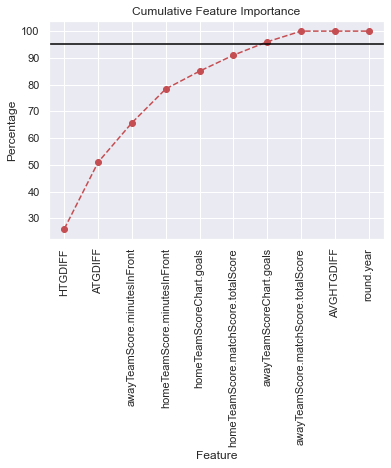

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

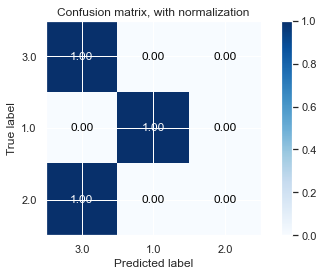

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 91.09%


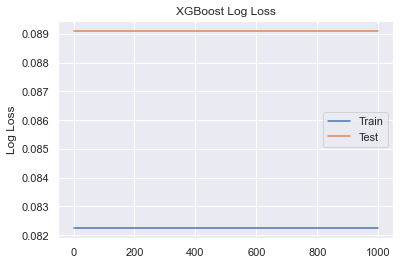

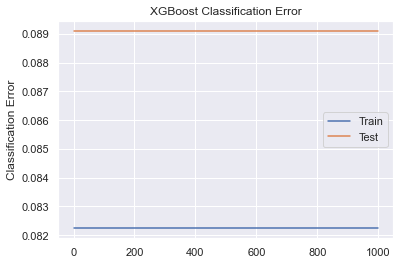

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
27,Port Adelaide,Melbourne,1.0
28,Geelong Cats,Brisbane Lions,3.0
29,Sydney Swans,North Melbourne,1.0
30,Collingwood,West Coast Eagles,1.0
31,Richmond,Western Bulldogs,3.0
32,Fremantle,GWS Giants,1.0
33,Essendon,Adelaide Crows,3.0
34,Hawthorn,St Kilda,3.0
35,Gold Coast Suns,Carlton,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
27,Port Adelaide,Melbourne,1.0,0.641810,0.167333,0.190857
28,Geelong Cats,Brisbane Lions,3.0,0.157051,0.152203,0.690746
29,Sydney Swans,North Melbourne,1.0,0.462013,0.195606,0.342381
30,Collingwood,West Coast Eagles,1.0,0.641810,0.167333,0.190857
31,Richmond,Western Bulldogs,3.0,0.157051,0.152203,0.690746
32,Fremantle,GWS Giants,1.0,0.641810,0.167333,0.190857
33,Essendon,Adelaide Crows,3.0,0.157051,0.152203,0.690746
34,Hawthorn,St Kilda,3.0,0.157051,0.152203,0.690746
35,Gold Coast Suns,Carlton,1.0,0.641810,0.167333,0.190857


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
27,Port Adelaide,Melbourne,1.0,0.641810,0.167333,0.190857,0.358190
28,Geelong Cats,Brisbane Lions,3.0,0.157051,0.152203,0.690746,0.690746
29,Sydney Swans,North Melbourne,1.0,0.462013,0.195606,0.342381,0.537987
30,Collingwood,West Coast Eagles,1.0,0.641810,0.167333,0.190857,0.358190
31,Richmond,Western Bulldogs,3.0,0.157051,0.152203,0.690746,0.690746
32,Fremantle,GWS Giants,1.0,0.641810,0.167333,0.190857,0.358190
33,Essendon,Adelaide Crows,3.0,0.157051,0.152203,0.690746,0.690746
34,Hawthorn,St Kilda,3.0,0.157051,0.152203,0.690746,0.690746
35,Gold Coast Suns,Carlton,1.0,0.641810,0.167333,0.190857,0.358190
